# 1D signal processing

In [1]:
!pip install librosa

## 1. Time domain and file manipulation

### 1.1. Loading an audio file

In [ ]:
import librosa

audio_path_buzz = r'resources/1D/car_ramp_buzz.wav'
audio_path_cat = r'resources/1D/cat.wav'
audio_path_stereo = r'resources/1D/light_stereo.wav'
audio_path_speech = r'resources/1D/speech.wav'
 
y, sr = librosa.load(audio_path_speech)
print('type(y): ', type(y)) # <class 'numpy.ndarray'>
print('y.shape: ', y.shape) # (n,) 1D array
print('sr: ', sr)

type(y):  <class 'numpy.ndarray'>
y.shape:  (57066,)
sr:  22050


* Inspect the sample rate using the GUI (Nautilus (Linux) -> audio properties; File Explorer (Widnows) -> details)
* Is the sample rate correct?
* Inspect [librosa.load() documentation](https://librosa.org/doc/latest/generated/librosa.load.html).

In [3]:
y, sr = librosa.load(audio_path_speech, sr=None)
print('type(y): ', type(y))
print('y.shape: ', y.shape)
print('sr: ', sr)

type(y):  <class 'numpy.ndarray'>
y.shape:  (41408,)
sr:  16000


* Why did the shape change?
* What is the audio duration [seconds]? How do you compute it?

Loading a stereo audio:

In [ ]:
y, sr = librosa.load(audio_path_stereo, sr=None)
print('type(y): ', type(y)) 
print('y.shape: ', y.shape)
print('sr: ', sr)

type(y):  <class 'numpy.ndarray'>
y.shape:  (299880,)
sr:  44100


* Is this audio stereo? What would make it stereo?
* Inspect [librosa.load() documentation](https://librosa.org/doc/latest/generated/librosa.load.html).

In [ ]:
y, sr = librosa.load(audio_path_stereo, sr=None, mono=False) # mare atentie la cum e fisierul audio cand il incarci
print('type(y): ', type(y))                      # nu mai e 1D array, e 2D array
print('y.shape: ', y.shape)
print('sr: ', sr)

type(y):  <class 'numpy.ndarray'>
y.shape:  (2, 299880)
sr:  44100


* Inspect the bit depth of audio files using GUI ((Nautilus (Linux) -> audio properties; File Explorer (Widnows) -> details))
* What is the bit depth of the python objects that contain the audios? Is it enough for representing them at their true quality level? (inspect documentation, again)

In [6]:
print(y.dtype)

float32


⚠️ In fact, usually it is best to use soundfile for I/O operations and librosa for processing

In [7]:
!pip install soundfile

In [8]:
import soundfile as sf

y, sr = sf.read(audio_path_stereo)
print('type(y): ', type(y))
print('y.shape: ', y.shape)
print('sr: ', sr)

type(y):  <class 'numpy.ndarray'>
y.shape:  (299880, 2)
sr:  44100


* soundfile uses (samples, ch); librosa uses (ch, samples)

In [9]:
y_librosa = y.T
print('librosa format: ', y_librosa.shape)
y_soundfile = y_librosa.T
print('soundfile format: ', y_soundfile.shape)

librosa format:  (2, 299880)
soundfile format:  (299880, 2)


### 1.2. Saving to an audio file

In [12]:
import soundfile as sf

y, sr = sf.read(audio_path_stereo)
print('type(y): ', type(y))
print('y.shape: ', y.shape) 
print('sr: ', sr)

output_path = r'out.wav'
sf.write(output_path, y, sr) # SAVE TO DISK
y_reloaded, sr_reloaded = sf.read(audio_path_stereo)
print('y.shape: ', y_reloaded.shape)
print('sr: ', sr_reloaded)

type(y):  <class 'numpy.ndarray'>
y.shape:  (299880, 2)
sr:  44100
y.shape:  (299880, 2)
sr:  44100


### 1.3 Plot a waveform

In [13]:
!pip install matplotlib

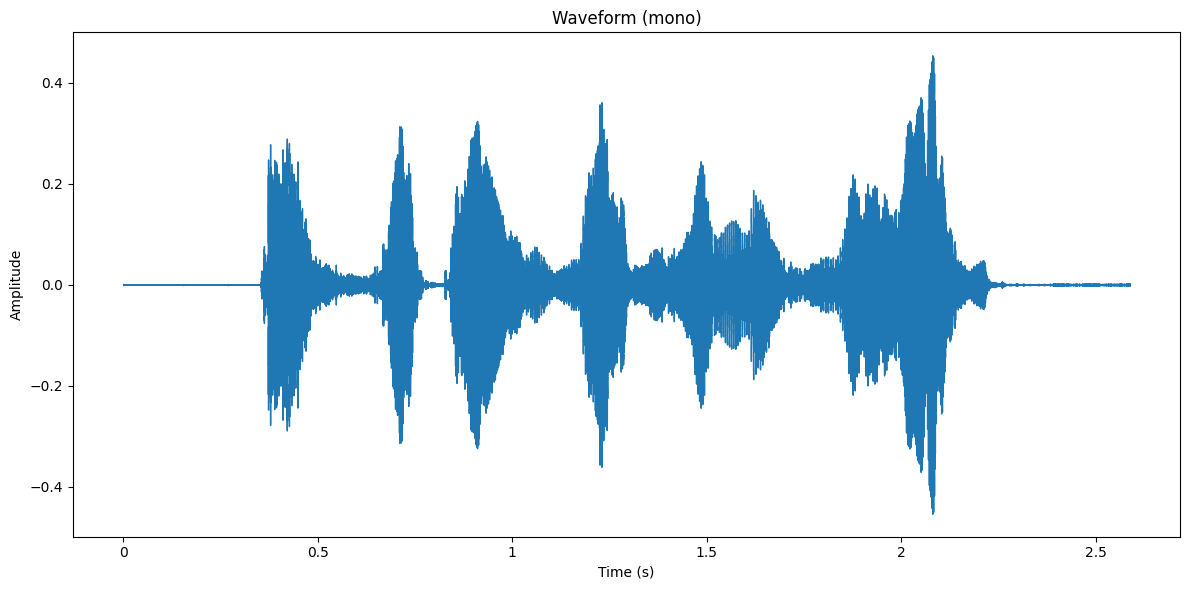

In [16]:
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(y):
    plt.figure(figsize=(12, 6))
    if y.ndim == 1:
        plt.subplot(1, 1, 1)
        librosa.display.waveshow(y, sr=sr)
        plt.title("Waveform (mono)")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    else:
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(y[0], sr=sr)
        plt.title("Left channel")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        plt.subplot(2, 1, 2)
        librosa.display.waveshow(y[1], sr=sr, color='orange')
        plt.title("Right channel")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

y, sr = sf.read(audio_path_speech)
plot_waveform(y.T)


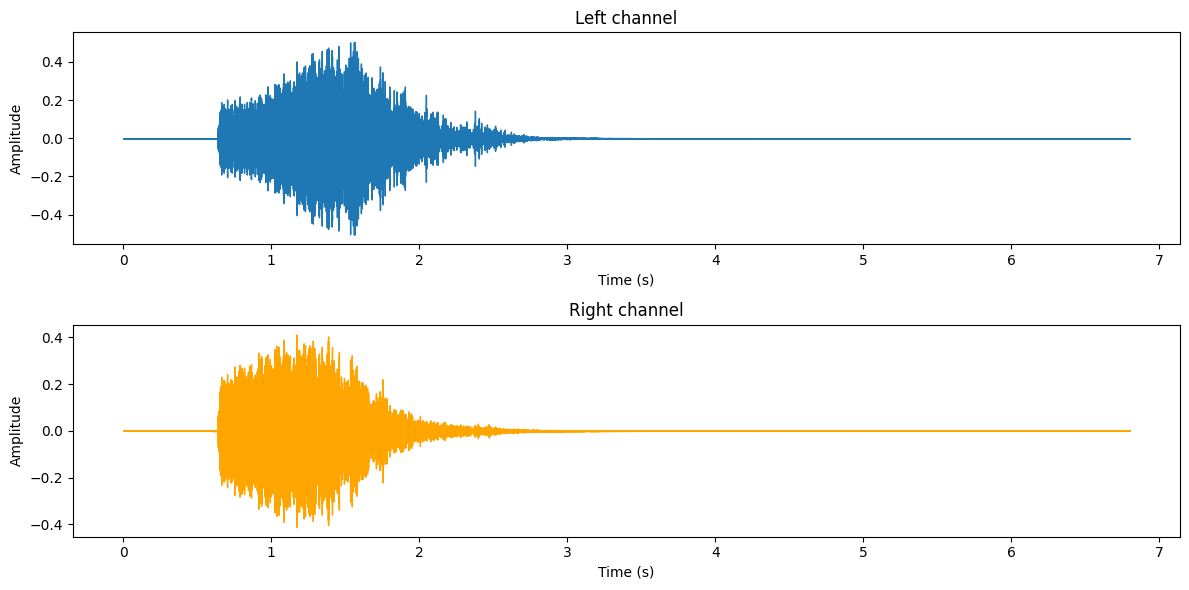

In [18]:
y, sr = sf.read(audio_path_stereo)
plot_waveform(y.T)

### 1.4 Resampling

In [22]:
import librosa
import soundfile as sf

y, sr = librosa.load(audio_path_speech, sr=None)
print("Original sample rate:", sr, " | Shape:", y.shape)

target_sr = 8000
y_resampeld = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
print(f"Resampled sample rate {target_sr} | Shape:", y_resampeld.shape)

sf.write(f"your_audio_{target_sr}.wav", y_resampeld, target_sr)

target_sr = 4000
y_resampeld = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
print(f"Resampled sample rate {target_sr} | Shape:", y_resampeld.shape)

sf.write(f"your_audio_{target_sr}.wav", y_resampeld, target_sr)

Original sample rate: 16000  | Shape: (41408,)
Resampled sample rate 8000 | Shape: (20704,)
Resampled sample rate 4000 | Shape: (10352,)


* Listen to the resampled audios and compare them withthe original. What changed?

### 1.5 Time domain **features**

 * These *features* were used in the past for classical ML models (random forest, SVM, MLP, shallow neural networks) operating on signals.
 * Deep neural networks usually are capable of operating directly on raw data (but still, they usually operate on frequency or time-frequency domain low-level features such as spectrograms - TBD)
 * Totday, these *features* are still in use for tasks where data is very limited or if the tasks are simple enough, such as *biomedical*, *voice activity detectors* or *seismic signal analysis*.

#### Zero-crossing rate

The Zero-Crossing Rate (ZCR) is the rate at which a signal changes its sign (crosses the zero axis). It indicates the **frequency** content of a signal.

**Formula:**
$$
ZCR = \frac{1}{N-1} \sum_{n=1}^{N-1} \left| s(n) \cdot s(n+1) < 0 \right|
$$
Where \( s(n) \) is the signal at time \(n\) and \(N\) is the total number of samples.

In speech, **ZCR** is usually **low for vocals** and **high for consonants** (hey have high degree of randomness => they cross zero more times)


In [48]:
import numpy as np

def zero_crossing_rate(signal):
    return np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)

#### Root Mean Square (RMS) Energy

RMS energy measures the **overall power** or **loudness** of a signal over time. It is useful for detecting variations in **signal amplitude**.

**Formula:**
$$
RMS = \sqrt{\frac{1}{N} \sum_{n=1}^{N} x(n)^2}
$$
Where \( x(n) \) is the signal at time \(n\), and \(N\) is the number of samples.

In speech, **RMS Energy** is usually **high for vocals** and **low for consonants** (usually sharp and shorter).

In [24]:
def rms_energy(signal):
    return np.sqrt(np.mean(signal ** 2))

#### Autocorrelation

Autocorrelation measures how a signal correlates with a **shifted version** of itself, helping to detect **periodicity** or repeating patterns.

**Formula:**
$$
R_x(k) = \sum_{n=0}^{N-k-1} x(n) \cdot x(n+k)
$$
Where \( x(n) \) is the signal at time \(n\) and \(k\) is the time lag.

In speech, **autocorrelation** is usually **high for vocals** (because they are periodic) and **low for consonants**

In [25]:
def autocorrelation(signal, lag):
    return np.corrcoef(signal[:-lag], signal[lag:])[0, 1] 

## 2. Frequency domain

Generate synthetic signals (sin linear combination)

(2000,)


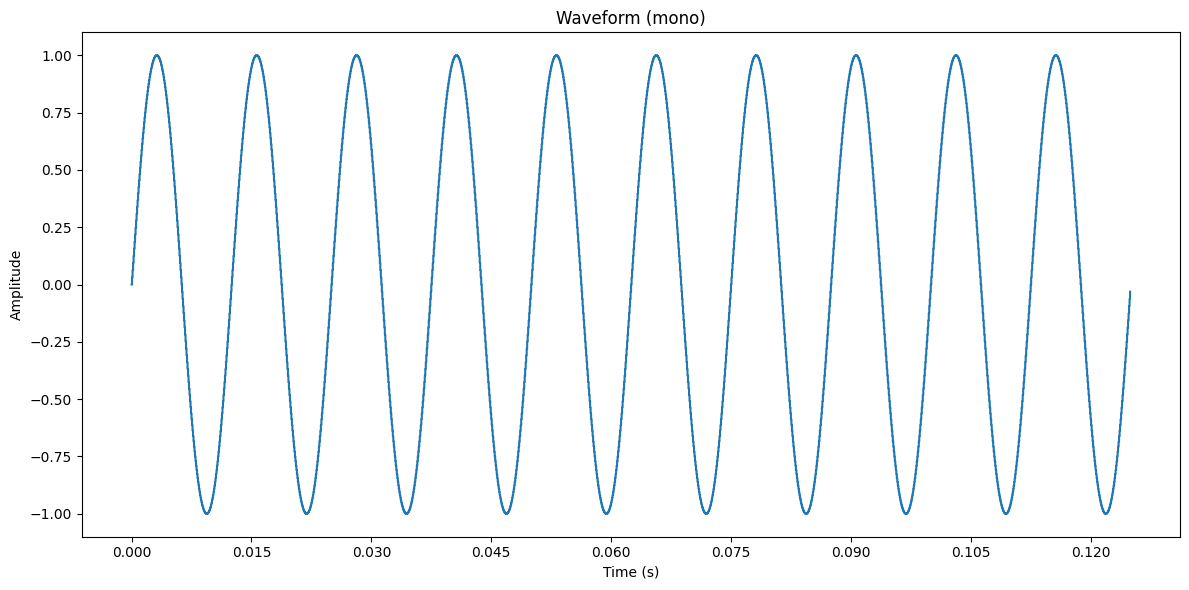

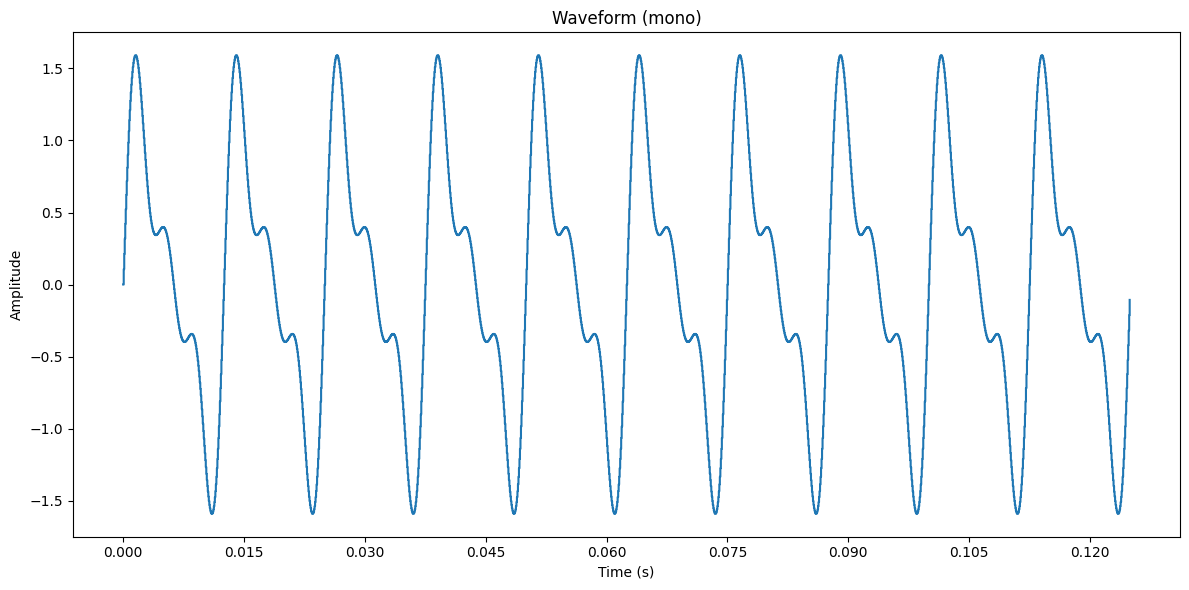

In [26]:
import numpy as np

fs = 1000 # sample rate (Hz)
dur = 2 # duration (s)
t = np.arange(0, dur, 1/fs) # np.arange() -> reurns evenly spaced values in the given interval
print(t.shape)

f0 = 5 # sine frequency
x_sine = np.sin(2 * np.pi * f0 * t) # computes the sin of each element in the input vecotr (radians)

f1, f2, f3 = 5, 10, 15
x_mix = (
    1.00 * np.sin(2 * np.pi * f1 * t) +
    0.60 * np.sin(2 * np.pi * f2 * t) +
    0.40 * np.sin(2 * np.pi * f3 * t)
)


# -----------------------------
# Time-domain visualization
# -----------------------------
plot_waveform(x_sine)
plot_waveform(x_mix)

In [27]:
!pip install scipy

### 1.1 DFT


In [ ]:
from scipy.signal import welch, firwin, freqz

def one_sided_magnitude_spectrum(x, fs, verbose=False):
    '''one-sided DFT (Discrete Fouriter Transform)'''
    N = len(x)
    X = np.fft.rfft(x) # .rfft() computes DFT dor non-negative frequencies
    if verbose:
        print(X.dtype)
    mag = np.abs(X) # np.abs(X) is the MAGNITUDE of each FFT bin
    mag *= 2.0  # * 2 to move the energy in negative freq to positive freq;
    mag /= N # / N averages the raw DFT sum
    mag[0] /= 2.0
    if N % 2 == 0:
        mag[-1] /= 2.0 # do not double DC (0Hz) (it doesn;t have negative correspondent)
    freq_axis = np.fft.rfftfreq(N, d=1.0/fs) # generate the frequency axis
    return freq_axis, mag

def plot_magnitude_spectrum(f, mag, title):
    plt.figure()
    plt.plot(f, mag)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.tight_layout()

def one_sided_phase_spectrum(x, fs):
    N = len(x)
    X = np.fft.rfft(x) # .rfft() computes DFT dor non-negative frequencies
    phase = np.angle(X)  # get the ANGLE in radians (in [-pi, pi])
    freq_axis = np.fft.rfftfreq(N, d=1.0/fs)
    return freq_axis, phase

def plot_phase_spectrum(f, phase, title):
    plt.figure()
    plt.plot(f, phase, ".-")
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (rad)")
    plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
               [r"$-\pi$", r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"])
    plt.tight_layout()
    plt.show()

* Plot the magnitude spectrum of the signals

complex128


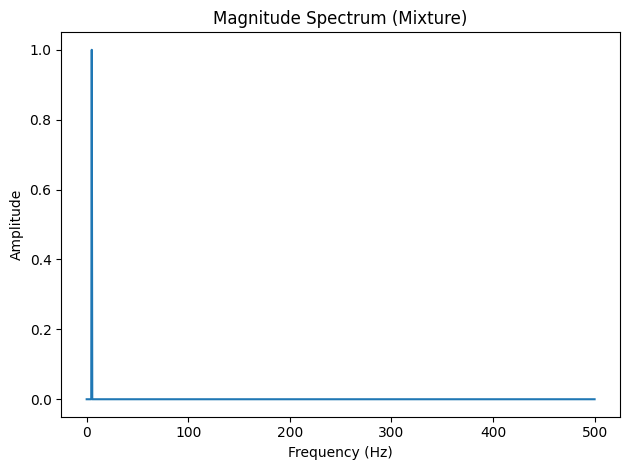

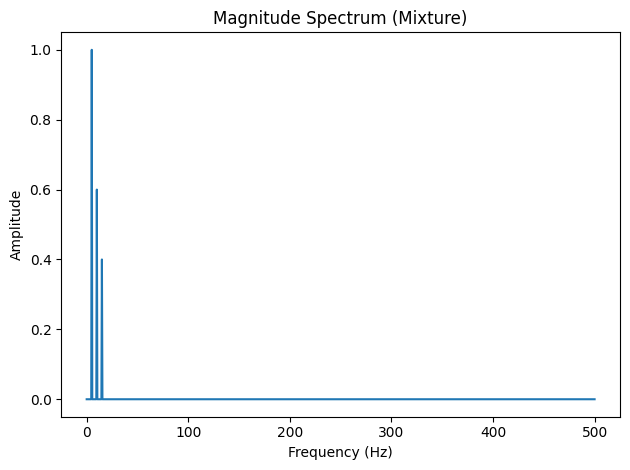

In [31]:
# -----------------------------
# FFT magnitude spectrum
# -----------------------------
f_mag, mag = one_sided_magnitude_spectrum(x_sine, fs, verbose=True)
plot_magnitude_spectrum(f_mag, mag, "Magnitude Spectrum (Mixture)")

f_mag, mag = one_sided_magnitude_spectrum(x_mix, fs)
plot_magnitude_spectrum(f_mag, mag, "Magnitude Spectrum (Mixture)")

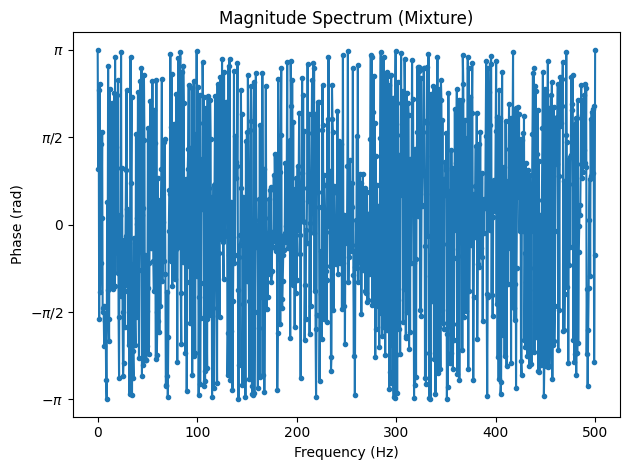

In [32]:
f_mag1, phase1 = one_sided_phase_spectrum(x_sine, fs)
plot_phase_spectrum(f_mag1, phase1, "Magnitude Spectrum (Mixture)")

Why so noisy?
 * 'noise' results from the nuemrical definition of phase
 * dut it doesn;t matter, because the magnitude spectrum is zero at all values, except 5 KHz

In [33]:
target_freq = 5
idx = np.argmin(np.abs(f_mag1 - target_freq))
print(phase1[idx]) # -pi/2 -> one single sine -> phase 0, but phase is measured as cos (-pi/2 shifted cos is sin)

-1.5707963267948972


Default reference for fourier is cosine $$A cos(\omega t + \phi)$$
$$sin(\omega t) = cos(\omega t - \frac{\pi}{2})$$

### 2.2 PSD (Power Spectral Density)

    * it is a **density**, so it is consistent with the number of bins `N`
    * magnitude spectrum is **not invariant** to `N`
    * PSD is used in **EEG** (electroencephalogram ) signals and noise analysis

The most basic form of PSD is a periodgram:
$$P_{xx}(f) = \frac{1}{N f_s} |X(f)|^2$$

The square of average DFT magnitude is scaled by:
 * $1/N$ to counter the averageing over `N` samples
 * dividing by sampling frequency $f_s$ makes it come out as power per **Hz**

In [39]:
def plot_psd(x, fs, title, nperseg=1024):
    # The simplest estimate is a periodgram - but it's noisy
    # Welch's method splits the signal into overlapping windows, computes periodgrams for each segment, than averages them
    f, Pxx = welch(x, fs=fs, nperseg=min(nperseg, len(x)))
    plt.figure()
    plt.semilogy(f, Pxx)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD (Power/Hz)")
    plt.tight_layout()

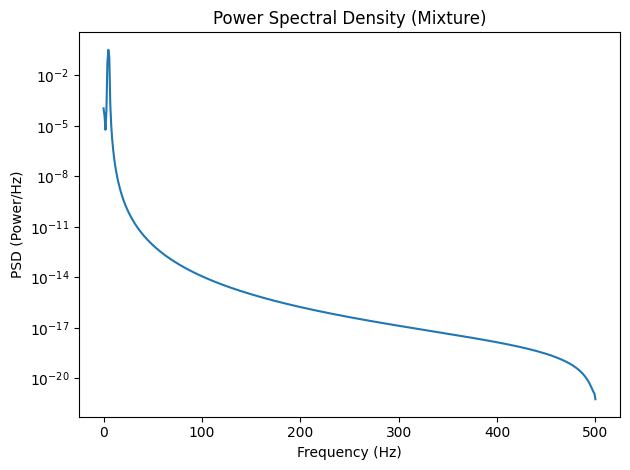

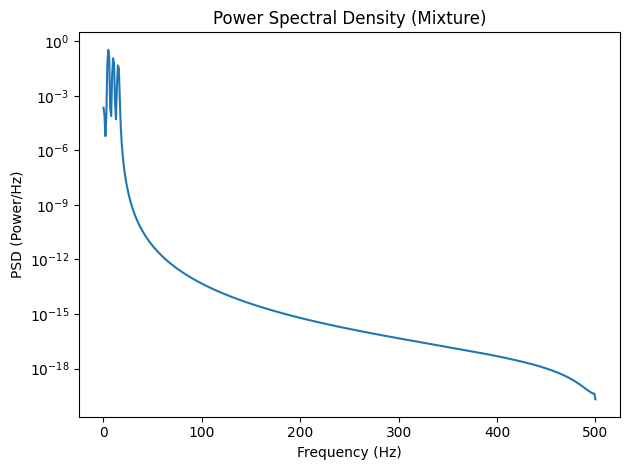

In [40]:
# -----------------------------
# PSD (Welch)
# -----------------------------
plot_psd(x_sine, fs, "Power Spectral Density (Mixture)")
plot_psd(x_mix, fs, "Power Spectral Density (Mixture)")

### 2.3 Filtering

In [41]:

def plot_transfer_function(b, fs, title):
    w, h = freqz(b, worN=4096, fs=fs)
    H = 20 * np.log10(np.maximum(np.abs(h), 1e-12))
    plt.figure()
    plt.plot(w, H)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.tight_layout()

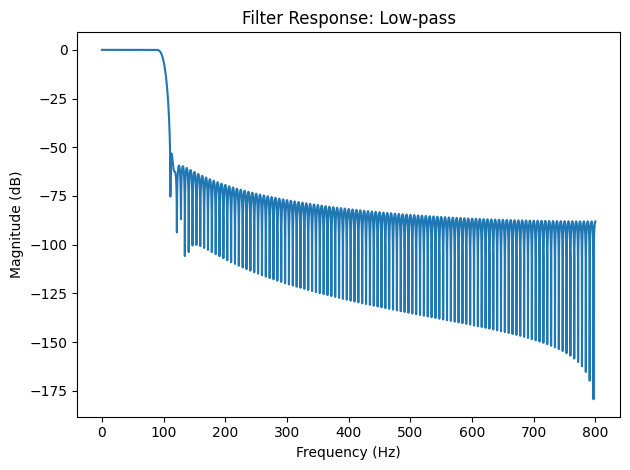

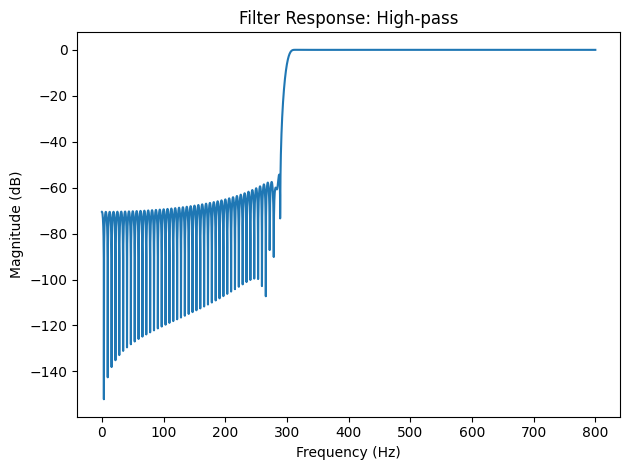

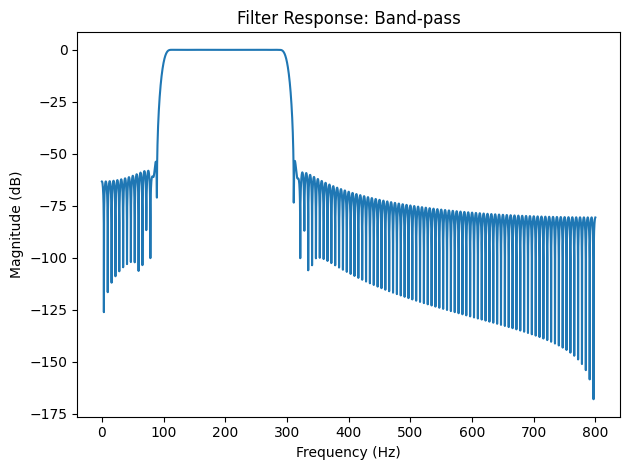

In [42]:
numtaps = 255
fs = 1600

# Low-pass filter (FTJ)
b_lpf = firwin(numtaps=numtaps, cutoff=100.0, window="hamming", fs=fs, pass_zero="lowpass")

# High-pass filter (FTS)
b_hpf = firwin(numtaps=numtaps, cutoff=300.0, window="hamming", fs=fs, pass_zero="highpass")

# Band-pass: pass (FTB)
b_bpf = firwin(numtaps=numtaps, cutoff=[100, 300], window="hamming", fs=fs, pass_zero="bandpass")


plot_transfer_function(b_lpf, fs, "Filter Response: Low-pass")
plot_transfer_function(b_hpf, fs, "Filter Response: High-pass")
plot_transfer_function(b_bpf, fs, "Filter Response: Band-pass")

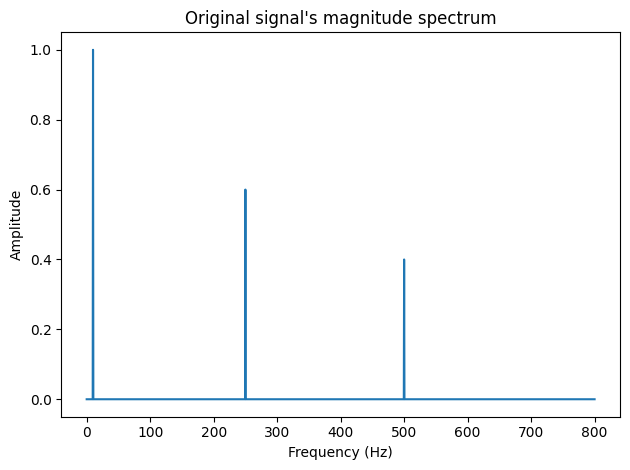

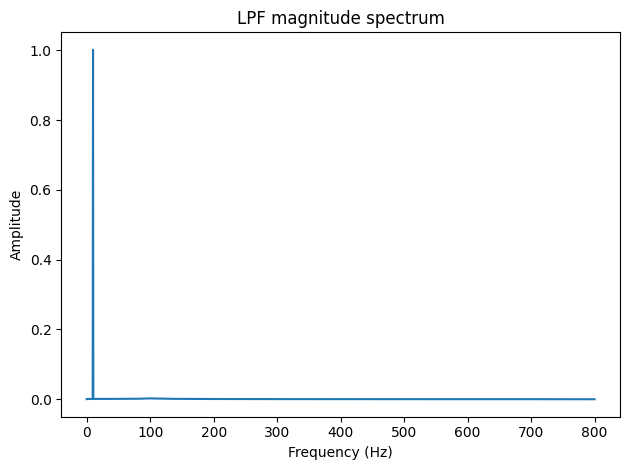

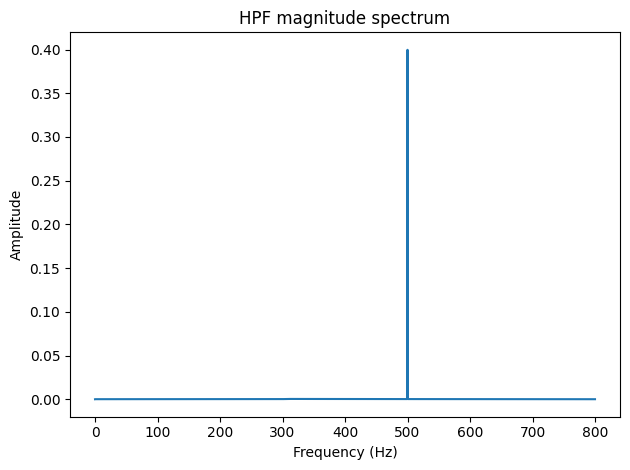

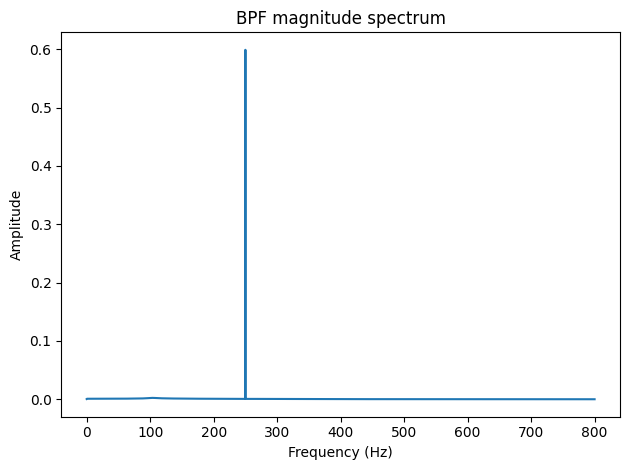

In [43]:
from scipy.signal import filtfilt

fs = 1600 # sample rate (Hz)
dur = 2 # duration (s)
t = np.arange(0, dur, 1/fs) # np.arange() -> reurns evenly spaced values in the given interval

f1, f2, f3 = 10, 250, 500
x = (
    1.00 * np.sin(2 * np.pi * f1 * t) +
    0.60 * np.sin(2 * np.pi * f2 * t) +
    0.40 * np.sin(2 * np.pi * f3 * t)
)

x_lpf = filtfilt(b_lpf, [1.0], x)
x_hpf = filtfilt(b_hpf, [1.0], x)
x_bpf = filtfilt(b_bpf, [1.0], x)

freq_axis_x, mag_x = one_sided_magnitude_spectrum(x, fs)
freq_axis_lpf, mag_lpf = one_sided_magnitude_spectrum(x_lpf, fs)
freq_axis_hpf, mag_hpf = one_sided_magnitude_spectrum(x_hpf, fs)
freq_axis_bpf, mag_bpf = one_sided_magnitude_spectrum(x_bpf, fs)

plot_magnitude_spectrum(freq_axis_x, mag_x, "Original signal's magnitude spectrum")
plot_magnitude_spectrum(freq_axis_lpf, mag_lpf, "LPF magnitude spectrum")
plot_magnitude_spectrum(freq_axis_hpf, mag_hpf, "HPF magnitude spectrum")
plot_magnitude_spectrum(freq_axis_bpf, mag_bpf, "BPF magnitude spectrum")

### 2.4 DFT on real signals

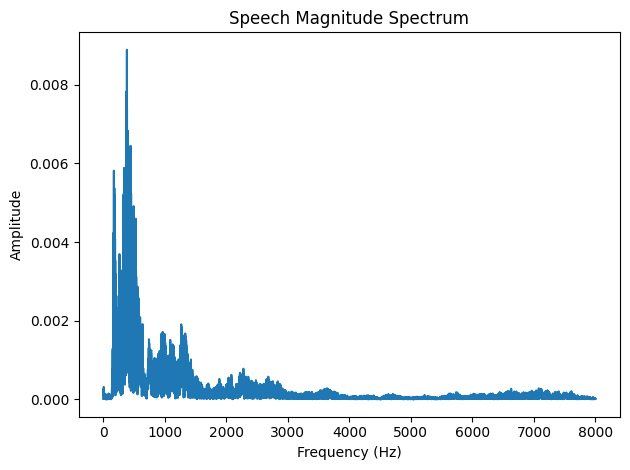

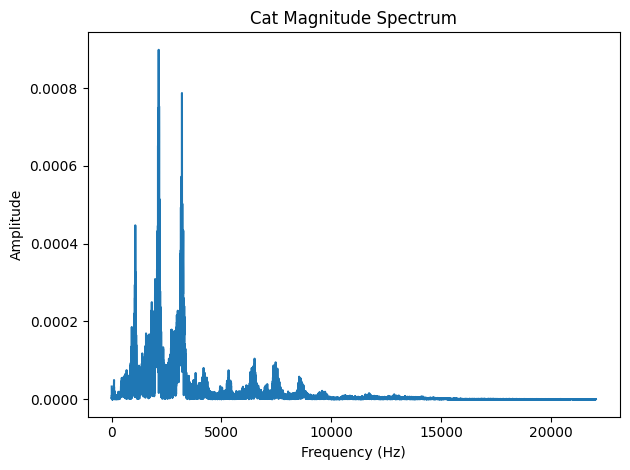

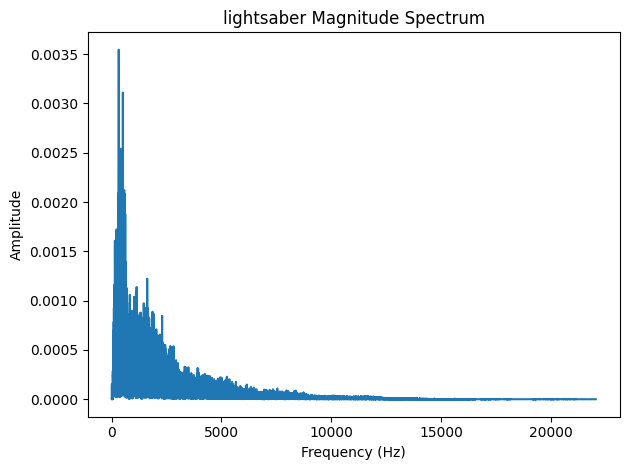

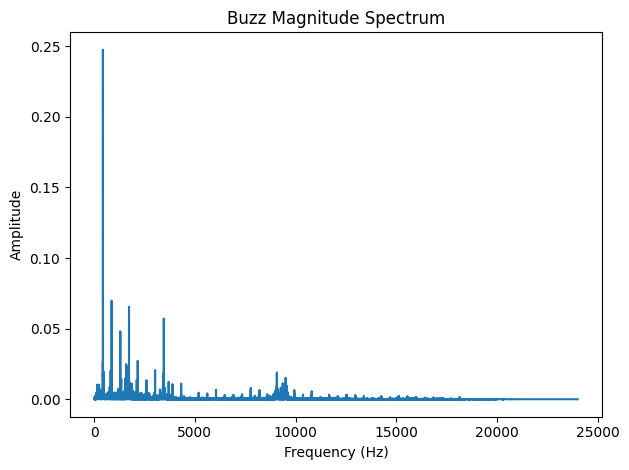

In [44]:
import soundfile as sf

x, sr = sf.read(audio_path_speech)
freq_axis_x, mag_x = one_sided_magnitude_spectrum(x, sr)
plot_magnitude_spectrum(freq_axis_x, mag_x, "Speech Magnitude Spectrum")

x, sr = sf.read(audio_path_cat)
x = x.mean(axis=1)
freq_axis_x, mag_x = one_sided_magnitude_spectrum(x, sr)
plot_magnitude_spectrum(freq_axis_x, mag_x, "Cat Magnitude Spectrum")

x, sr = sf.read(audio_path_stereo)
x = x.mean(axis=1)
freq_axis_x, mag_x = one_sided_magnitude_spectrum(x, sr)
plot_magnitude_spectrum(freq_axis_x, mag_x, "lightsaber Magnitude Spectrum")

x, sr = sf.read(audio_path_buzz)
x = x.mean(axis=1)
freq_axis_x, mag_x = one_sided_magnitude_spectrum(x, sr)
plot_magnitude_spectrum(freq_axis_x, mag_x, "Buzz Magnitude Spectrum")


* What can be said about the 4 signals based only on DFT?
* Is the DFT enough? When is it enough and when not?

## 3. Time-frequency signal representaion

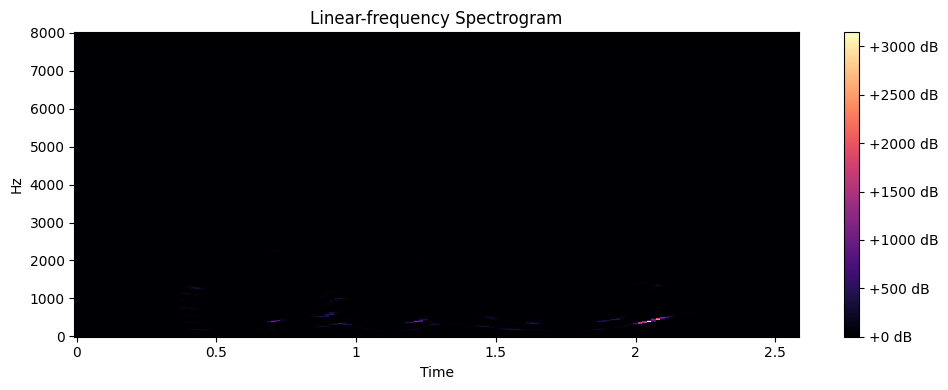

In [ ]:
import numpy as np
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt

x, sr = sf.read(audio_path_speech)
if x.ndim == 2:
    x = x.mean(axis=1)  # average stereo -> mono

# 2) parameters
n_fft = 1024 # window size sau nr de puncte din FFT
hop_length = 256    # step size      
win_length = 1024  # window size
n_mels = 80 
fmin = 0
fmax = sr/2  # or 8000 for sr=16000

# 1) Spectrogram
D = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window="hann")
spectrogram = np.abs(D)**2

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length,
                         x_axis="time", y_axis="linear")
plt.title("Linear-frequency Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()

plt.show()


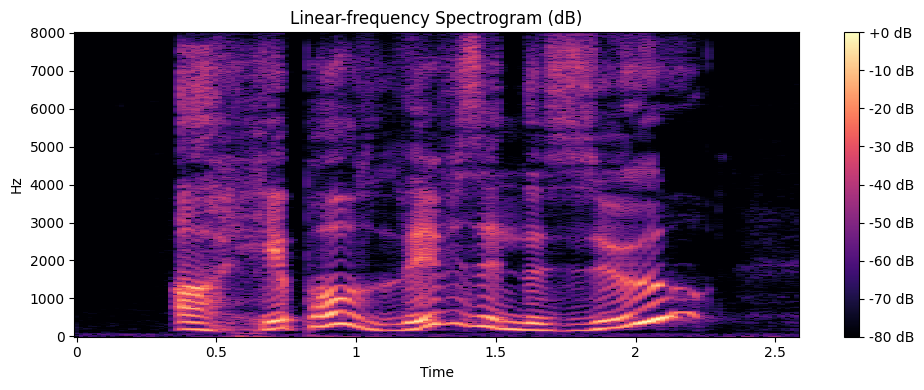

In [46]:
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,
                         x_axis="time", y_axis="linear")
plt.title("Linear-frequency Spectrogram (dB)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()

plt.show()

(80, 162) (80, 162)


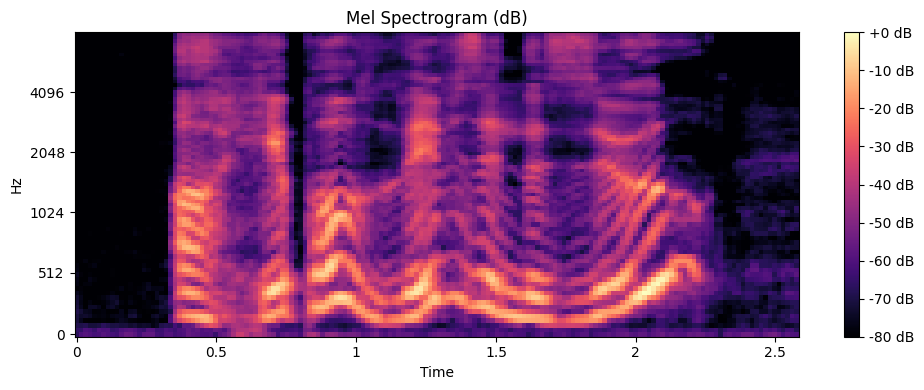

In [47]:
mel_spectrogram = librosa.feature.melspectrogram(
    y=x,
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    win_length=win_length,
    window="hann",
    n_mels=n_mels,
    fmin=fmin,
    fmax=fmax,
    power=2.0
)

log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
print(mel_spectrogram.shape, log_mel_spectrogram.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length,
                         x_axis="time", y_axis="mel", fmin=fmin, fmax=fmax)
plt.title("Mel Spectrogram (dB)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()

plt.show()